## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
df= pd.read_csv("https://opendata-ajuntament.barcelona.cat/data/dataset/73f09843-ab4e-4f13-81fb-b801ca371909/resource/0e3b6840-7dff-4731-a556-44fac28a7873/download/temperaturesbarcelonadesde1780.csv")
df.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1,1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
2,1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
3,1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
4,1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


## Exploratory Data Analysis (EDA)

In [5]:
df.shape

(240, 13)

In [9]:
df.columns.values #or df.columns

array(['Any', 'Temp_Mitjana_Gener', 'Temp_Mitjana_Febrer',
       'Temp_Mitjana_Marc', 'Temp_Mitjana_Abril', 'Temp_Mitjana_Maig',
       'Temp_Mitjana_Juny', 'Temp_Mitjana_Juliol', 'Temp_Mitjana_Agost',
       'Temp_Mitjana_Setembre', 'Temp_Mitjana_Octubre',
       'Temp_Mitjana_Novembre', 'Temp_Mitjana_Desembre'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    240 non-null    int64  
 1   Temp_Mitjana_Gener     240 non-null    float64
 2   Temp_Mitjana_Febrer    240 non-null    float64
 3   Temp_Mitjana_Marc      240 non-null    float64
 4   Temp_Mitjana_Abril     240 non-null    float64
 5   Temp_Mitjana_Maig      240 non-null    float64
 6   Temp_Mitjana_Juny      240 non-null    float64
 7   Temp_Mitjana_Juliol    240 non-null    float64
 8   Temp_Mitjana_Agost     240 non-null    float64
 9   Temp_Mitjana_Setembre  240 non-null    float64
 10  Temp_Mitjana_Octubre   240 non-null    float64
 11  Temp_Mitjana_Novembre  240 non-null    float64
 12  Temp_Mitjana_Desembre  240 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.5 KB


In [10]:
# set year column as index
df.set_index('Any', inplace=True)

# translate index name into English
df.index.name = 'year'

# calculate the yearly average air temperature
df['average_temperature'] = df.mean(axis=1)

# drop columns containing monthly values
df = df[['average_temperature']]

# visualize the first 5 columns
df.head()

,average_temperature
year,
1780,14.075000
1781,14.716667
1782,13.633333
1783,14.400000
1784,13.616667


## Visualizing the Data

Text(0, 0.5, 'Temperature [°C]')

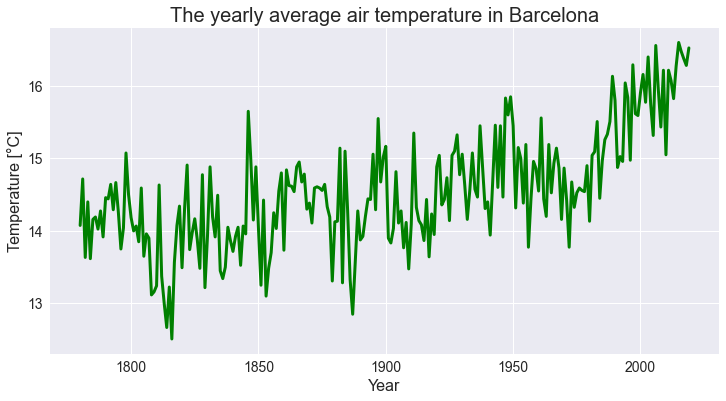

In [13]:
%matplotlib inline
plt.style.use('seaborn')

# line plot - the yearly average air temperature in Barcelona
df.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

## Calculating Simple Moving Average

In [14]:
# period of 10 years
df['SMA_10'] = df.average_temperature.rolling(10, min_periods=1).mean()

#period of 20 year
df['SMA_20'] = df.average_temperature.rolling(20, min_periods=1).mean()

Text(0, 0.5, 'Temperature [°C]')

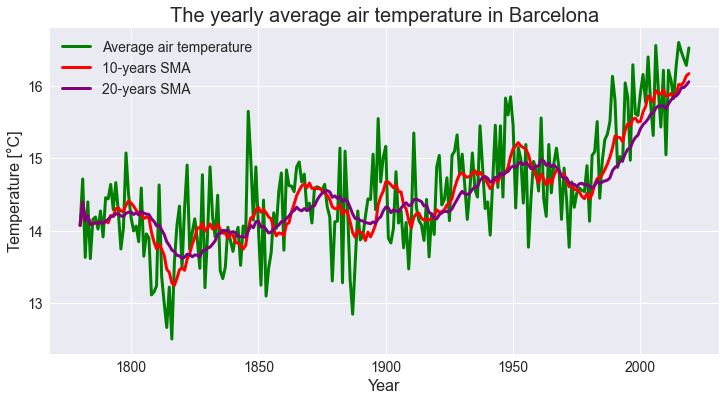

In [15]:
# colors for the line plot
colors = ['green', 'red', 'purple']

# line plot - the yearly average air temperature in Barcelona
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

## Calculating Cumulative Moving Average

In [18]:
df['CMA'] = df.average_temperature.expanding().mean()

Text(0, 0.5, 'Temperature [°C]')

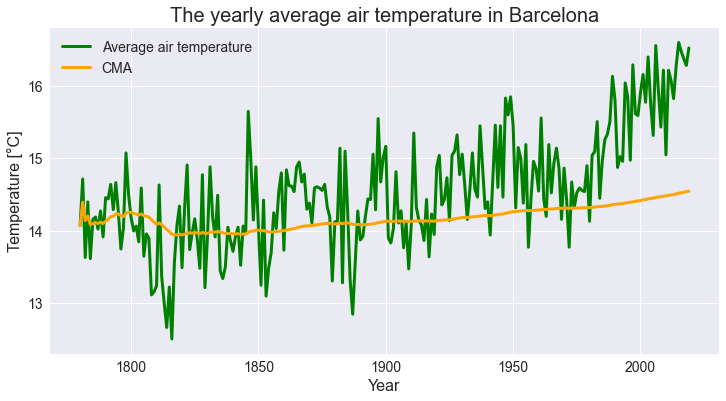

In [19]:
# colors for the line plot
colors = ['green', 'orange']

# line plot - the yearly average air temperature in Barcelona
df[['average_temperature', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', 'CMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

## Calculating Exponential Moving Average

In [21]:
# smoothing factor - 0.1
df['EMA_0.1'] = df.average_temperature.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
df['EMA_0.3'] = df.average_temperature.ewm(alpha=0.3, adjust=False).mean()

Text(0, 0.5, 'Temperature [°C]')

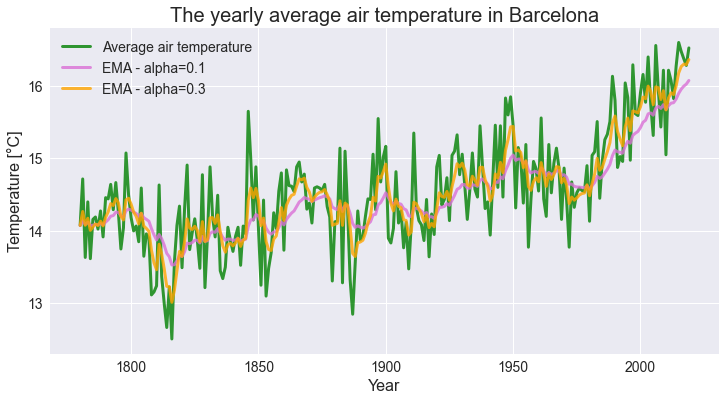

In [23]:
# colors for the line plot
colors = ['green', 'orchid', 'orange']

# line plot - the yearly average air temperature in Barcelona
df[['average_temperature', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average air temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

Credit: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c